# Import Necessary Pacakges

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from pandas_profiling import ProfileReport

In [2]:
data = pd.read_csv("breastcancerdata.csv")
df = pd.DataFrame(data)

From the pandas profile I have gained the following insights: There are 33 variables (31 numeric, 1 categorical, 1 unsupported - what does this mean?), 569 rows. In the diagosis section there are 357 Benign tumors and 217 malignant tumors. There is an unnmaed column of unsupportive type that has 569 missing values. There are a few columns with missing values - I will need to determine how I want to handle them when I explore later.

In [3]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [4]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 569 rows and 33 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.astype({'id': 'str'}).dtypes

id                          object
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


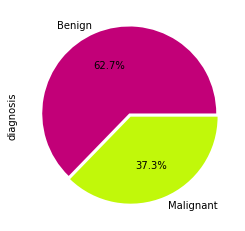

In [34]:
colors = ['#C20078','#C1F80A']
plot = df.diagnosis.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Benign', 'Malignant'], colors = colors, explode=[0.02,0.02])

# Evaluate For Null Values:

In [10]:
df_eval= df['Unnamed: 32'].isnull().sum()
print(df_eval)

569


I checked the 'Unnamed: 32' column and noted that all values are missing. After going back in the data set I noted that this was just a blank column in the data sheet and I will delete it.

In [11]:
df = df.drop(columns = 'Unnamed: 32')

In [12]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by= 'count', ascending = False)

,count,%
id,0,0.0
diagnosis,0,0.0
symmetry_worst,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0


It appears that I have no more missing values in the data set

# Evaluating The Numeric Features:

In [13]:
numerics = ['float64']
df_numeric = df.select_dtypes(include=numerics)

In [14]:
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Outlier Analysis:

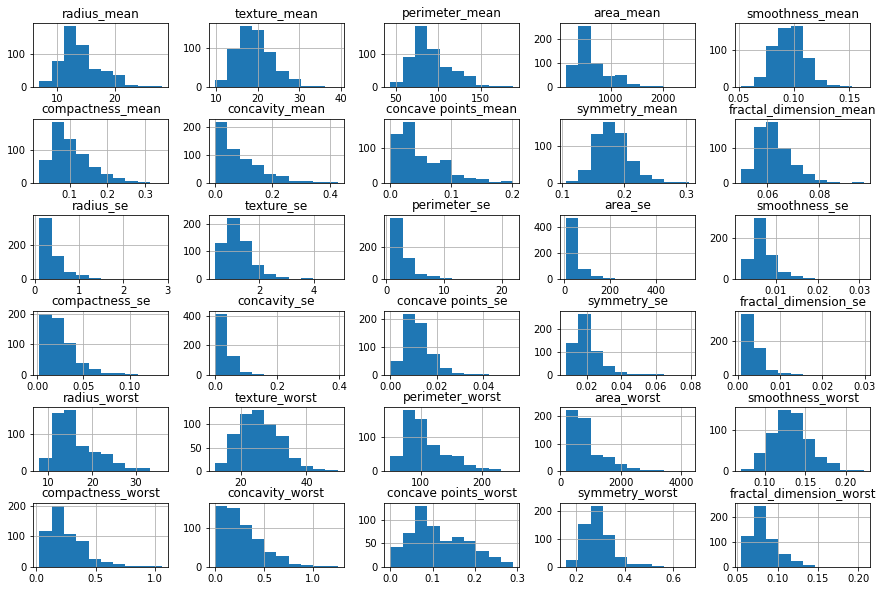

In [16]:
df_numeric.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

Most of the distributions exhibit right-sided skewness. I need to evaluate if I want to cap the data in order to prevent outliers that are greater than two standard deviations from the mean. 

In [17]:
mean = df['radius_mean'].mean()

In [18]:
std = df['radius_mean'].std()

In [19]:
maxcap = mean + 2*std
print(maxcap)

21.17538939231872


In [20]:
mincap = mean - (2 * std)
print(mincap)

7.079194087470407


In [22]:
df.loc[df.radius_mean > maxcap]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,1,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.3523,0.16200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,1,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,1,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
272,8910988,1,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,...,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
339,89812,1,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738


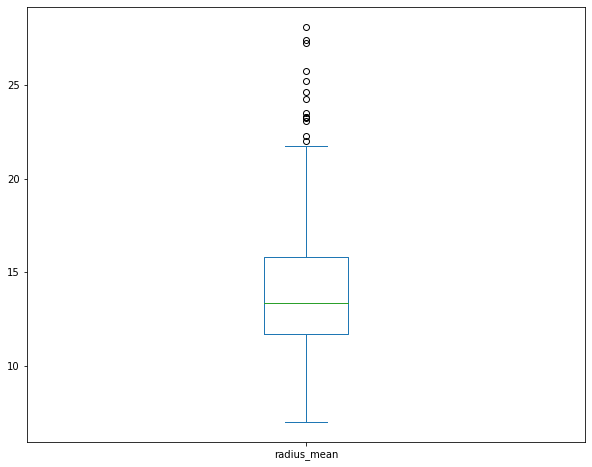

In [23]:
df['radius_mean'].plot(kind = 'box', figsize = (10,8))
plt.show()

In [24]:
df['radius_mean']= np.clip(df['radius_mean'], mincap, maxcap)

In [25]:
df['radius_mean'].describe()

count    569.000000
mean      14.041528
std        3.291042
min        7.079194
25%       11.700000
50%       13.370000
75%       15.780000
max       21.175389
Name: radius_mean, dtype: float64

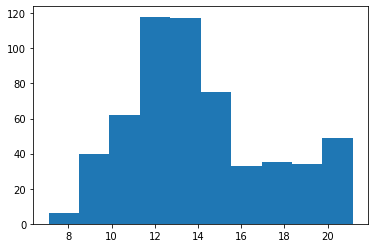

In [26]:
plt.hist(df['radius_mean'])
plt.show()

I worked through one example of how I would evaluate a feature's distribution and cap the data to two standard deviations within the mean in order to create a more normal distribution.

In [27]:
# save the data to a new csv file
df_cleaned = df
df.to_csv('df_cleaned.csv', index=False)